# Capstone Project - Car Accident Prediction
### Applied Data Science Capstone by IBM/Coursera

In [2]:
import pandas as pd
import numpy as np

In [3]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


### Data Pre-processing and Exploration

In [4]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Remove unmatched data 

In [5]:
df["STATUS"].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [6]:
df=df[df["STATUS"]=="Matched"]
df.shape

(189786, 38)

In [7]:
df["SEVERITYCODE"].value_counts()

1    132627
2     57159
Name: SEVERITYCODE, dtype: int64

Inbalanced datasheet, need to resample 

In [8]:
df1=df[['SEVERITYCODE','LOCATION','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
df1.head()

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2,5TH AVE NE AND NE 103RD ST,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight,NaN,NaN,N,N
1,1,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On,NaN,NaN,0,N
2,1,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight,NaN,NaN,0,N
3,1,2ND AVE BETWEEN MARION ST AND MADISON ST,Block,Other,3,0,0,3,Clear,Dry,Daylight,NaN,NaN,N,N
4,2,SWIFT AVE S AND SWIFT AV OFF RP,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight,NaN,NaN,0,N


#### Resampling(Undersampling) to create balanced datasheet

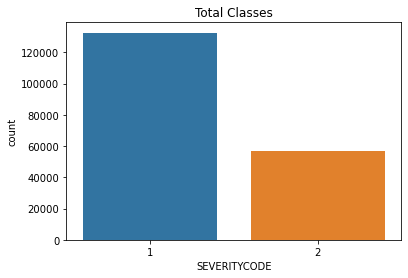

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.countplot('SEVERITYCODE', data=df1)
plt.title('Total Classes')
plt.show()

In [10]:
df1_shuffled=df1.sample(frac=1,random_state=4)
df1_2=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 2]
df1_1=df1_shuffled.loc[df1_shuffled['SEVERITYCODE'] == 1].sample(n=57159,random_state=42)
df2 = pd.concat([df1_1, df1_2])
df2.shape

(114318, 15)

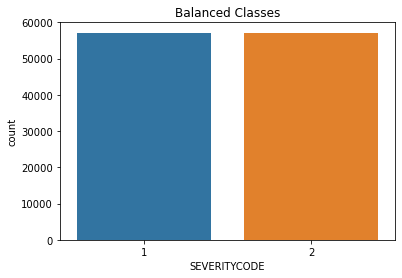

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
sns.countplot('SEVERITYCODE', data=df2)
plt.title('Balanced Classes')
plt.show()

#### Data engineering & analysis for each feature 

In [12]:
df2['COLLISIONTYPE'].value_counts()

Rear Ended    22936
Angles        22724
Parked Car    22331
Other         13748
Sideswipe      9340
Left Turn      8973
Pedestrian     6254
Cycles         5040
Right Turn     1609
Head On        1347
Name: COLLISIONTYPE, dtype: int64

In [13]:
df2.groupby(['COLLISIONTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

COLLISIONTYPE  SEVERITYCODE
Angles         2               0.599542
               1               0.400458
Cycles         2               0.941270
               1               0.058730
Head On        2               0.647365
               1               0.352635
Left Turn      2               0.603031
               1               0.396969
Other          1               0.555426
               2               0.444574
Parked Car     1               0.880794
               2               0.119206
Pedestrian     2               0.948993
               1               0.051007
Rear Ended     2               0.639649
               1               0.360351
Right Turn     1               0.621504
               2               0.378496
Sideswipe      1               0.731692
               2               0.268308
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='COLLISIONTYPE', ylabel='count'>

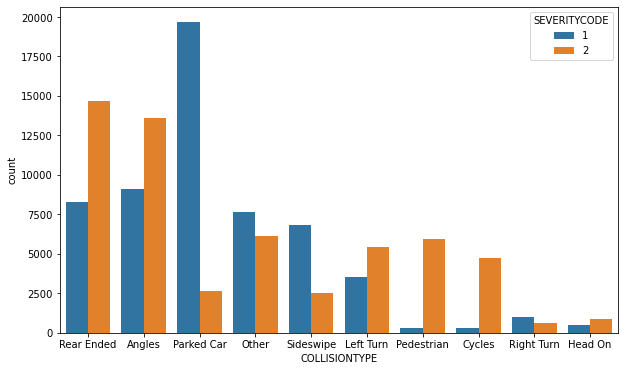

In [14]:
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='COLLISIONTYPE', hue='SEVERITYCODE',data=df2,order=df2['COLLISIONTYPE'].value_counts().index)

In [15]:
Location=df2['LOCATION'].value_counts()
Location[0:15]

BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB                          180
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                                          180
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N                                170
6TH AVE AND JAMES ST                                                                    159
RAINIER AVE S BETWEEN S BAYVIEW ST AND S MCCLELLAN ST                                   153
ALASKAN WY VI NB BETWEEN S ROYAL BROUGHAM WAY ON RP AND SENECA ST OFF RP                148
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N                          146
AURORA AVE N BETWEEN N 130TH ST AND N 135TH ST                                          138
ALASKAN WY VI SB BETWEEN COLUMBIA ST ON RP AND ALASKAN WY VI SB EFR OFF RP              133
WEST SEATTLE BR EB BETWEEN ALASKAN WY VI NB ON RP AND DELRIDGE-W SEATTLE BR EB ON RP    131
5TH AVE AND SPRING ST                                                           

In [16]:
df2['ADDRTYPE'].value_counts()

Block           70126
Intersection    42965
Alley             343
Name: ADDRTYPE, dtype: int64

In [17]:
df2.groupby(['ADDRTYPE'])['SEVERITYCODE'].value_counts(normalize=True)

ADDRTYPE      SEVERITYCODE
Alley         1               0.763848
              2               0.236152
Block         1               0.579371
              2               0.420629
Intersection  2               0.637984
              1               0.362016
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='ADDRTYPE', ylabel='count'>

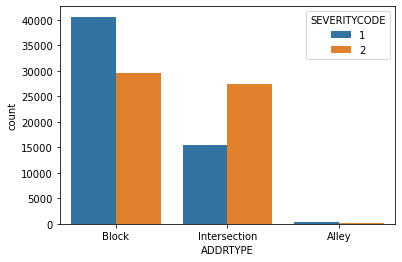

In [18]:
sns.countplot(x='ADDRTYPE', hue='SEVERITYCODE',data=df2, order=df2['ADDRTYPE'].value_counts().index)

63% intersection accident is severe 2 while only 42% block accident is severe 2

In [19]:
df2['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'],value=[0,1,2],inplace=True)

In [20]:
df2['PERSONCOUNT'].value_counts()

2     63669
3     22655
4      9764
1      6751
5      4483
0      3389
6      1939
7       842
8       390
9       164
10      101
11       45
12       27
13       20
14        9
17        9
15        8
16        8
19        4
20        4
18        3
25        3
27        3
34        3
37        2
24        2
29        2
30        2
22        2
23        1
53        1
48        1
47        1
44        1
43        1
39        1
31        1
36        1
32        1
28        1
26        1
81        1
54        1
57        1
Name: PERSONCOUNT, dtype: int64

In [21]:
df2['PEDCOUNT'].value_counts()

0    107749
1      6330
2       211
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [22]:
df2.groupby(['PEDCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCOUNT  SEVERITYCODE
0         1               0.527439
          2               0.472561
1         2               0.948973
          1               0.051027
2         2               0.981043
          1               0.018957
3         2               0.954545
          1               0.045455
4         2               1.000000
5         2               1.000000
6         2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='PEDCOUNT', ylabel='count'>

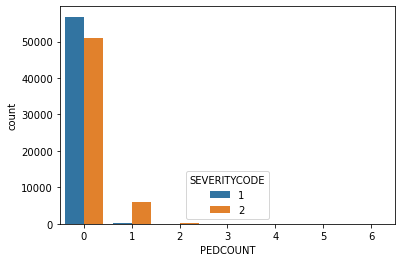

In [23]:
sns.countplot(x="PEDCOUNT", hue="SEVERITYCODE", data=df2)

When any pedestrian involved in accident, >94% of chance of accident being severity code 2 - injury  

In [24]:
df2['PEDCYLCOUNT'].value_counts()

0    109213
1      5062
2        43
Name: PEDCYLCOUNT, dtype: int64

In [25]:
df2.groupby(['PEDCYLCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

PEDCYLCOUNT  SEVERITYCODE
0            1               0.520625
             2               0.479375
1            2               0.940735
             1               0.059265
2            2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='PEDCYLCOUNT', ylabel='count'>

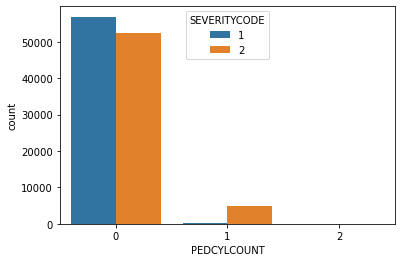

In [26]:
sns.countplot(x="PEDCYLCOUNT", hue="SEVERITYCODE", data=df2)

When any bicycle involved in accident, >94% of chance of accident being severity code 2 - injury  

In [27]:
df2.groupby(['VEHCOUNT'])['SEVERITYCODE'].value_counts(normalize=True)

VEHCOUNT  SEVERITYCODE
0         2               0.990000
          1               0.010000
1         2               0.736400
          1               0.263600
2         1               0.572199
          2               0.427801
3         2               0.624857
          1               0.375143
4         2               0.651753
          1               0.348247
5         2               0.701613
          1               0.298387
6         2               0.612245
          1               0.387755
7         2               0.628571
          1               0.371429
8         2               0.714286
          1               0.285714
9         2               0.857143
          1               0.142857
10        2               1.000000
11        2               1.000000
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='VEHCOUNT', ylabel='count'>

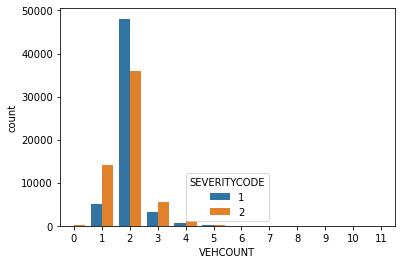

In [28]:
sns.countplot(x="VEHCOUNT", hue="SEVERITYCODE", data=df2)

In [29]:
df2['WEATHER'].value_counts()

Clear                       68208
Raining                     20739
Overcast                    16871
Unknown                      7000
Snowing                       460
Other                         450
Fog/Smog/Smoke                356
Sleet/Hail/Freezing Rain       69
Blowing Sand/Dirt              31
Severe Crosswind               16
Partly Cloudy                   5
Name: WEATHER, dtype: int64

In [30]:
df2.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=True)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1               0.516129
                          2               0.483871
Clear                     2               0.525452
                          1               0.474548
Fog/Smog/Smoke            2               0.525281
                          1               0.474719
Other                     1               0.742222
                          2               0.257778
Overcast                  2               0.518345
                          1               0.481655
Partly Cloudy             2               0.600000
                          1               0.400000
Raining                   2               0.538888
                          1               0.461112
Severe Crosswind          1               0.562500
                          2               0.437500
Sleet/Hail/Freezing Rain  1               0.594203
                          2               0.405797
Snowing                   1               0

Combine weather conditions to fewer distinct groups

In [31]:
df2['WEATHER'].replace(to_replace=['Other','Unknown','Clear','Raining','Overcast','Snowing','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'],value=[0,0,1,3,2,3,3,3,3,3,2],inplace=True)
indexNames = df2[df2['WEATHER'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2['WEATHER'].value_counts()

1.0    68208
3.0    21671
2.0    16876
Name: WEATHER, dtype: int64

In [32]:
df2['ROADCOND'].value_counts()

Dry               75863
Wet               29203
Ice                 609
Snow/Slush          459
Unknown             450
Other                69
Standing Water       68
Sand/Mud/Dirt        47
Oil                  37
Name: ROADCOND, dtype: int64

In [33]:
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND        SEVERITYCODE
Dry             2               0.525711
                1               0.474289
Ice             1               0.566502
                2               0.433498
Oil             2               0.648649
                1               0.351351
Other           2               0.594203
                1               0.405797
Sand/Mud/Dirt   1               0.531915
                2               0.468085
Snow/Slush      1               0.647059
                2               0.352941
Standing Water  1               0.558824
                2               0.441176
Unknown         1               0.742222
                2               0.257778
Wet             2               0.536109
                1               0.463891
Name: SEVERITYCODE, dtype: float64

Combine road conditions to fewer distinct groups

In [34]:
df2['ROADCOND'].replace(to_replace=['Other','Unknown','Dry','Wet','Ice','Snow/Slush','Standing Water','Sand/Mud/Dirt','Oil'],value=[0,0,1,2,3,3,3,2,2],inplace=True)
indexNames = df2[df2['ROADCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=True)

ROADCOND  SEVERITYCODE
1.0       2               0.525711
          1               0.474289
2.0       2               0.536142
          1               0.463858
3.0       1               0.598592
          2               0.401408
Name: SEVERITYCODE, dtype: float64

In [35]:
df2['LIGHTCOND'].value_counts()

Daylight                    70351
Dark - Street Lights On     28207
Dusk                         3464
Dawn                         1500
Unknown                      1139
Dark - No Street Lights       774
Dark - Street Lights Off      661
Other                         112
Dark - Unknown Lighting         5
Name: LIGHTCOND, dtype: int64

In [36]:
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1               0.583979
                          2               0.416021
Dark - Street Lights Off  1               0.532526
                          2               0.467474
Dark - Street Lights On   2               0.506505
                          1               0.493495
Dark - Unknown Lighting   2               0.600000
                          1               0.400000
Dawn                      2               0.537333
                          1               0.462667
Daylight                  2               0.541513
                          1               0.458487
Dusk                      2               0.550231
                          1               0.449769
Other                     1               0.580357
                          2               0.419643
Unknown                   1               0.791923
                          2               0.208077
Name: SEVERITYCODE, dtype: float64

Combine light conditions to fewer distinct groups

In [37]:
df2['LIGHTCOND'].replace(to_replace=['Other','Unknown','Daylight','Dark - Street Lights On','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Dark - Unknown Lighting'],value=[0,0,1,3,2,2,4,4,4],inplace=True)
indexNames = df2[df2['LIGHTCOND'] == 0 ].index
df2.drop(indexNames, inplace=True)
df2.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=True)

LIGHTCOND  SEVERITYCODE
1.0        2               0.541513
           1               0.458487
2.0        2               0.546334
           1               0.453666
3.0        2               0.506505
           1               0.493495
4.0        1               0.559722
           2               0.440278
Name: SEVERITYCODE, dtype: float64

#### Treat na and missing data

In [38]:
df2['SPEEDING'].value_counts()

Y    5958
Name: SPEEDING, dtype: int64

In [39]:
values = {'SPEEDING': 0, 'INATTENTIONIND': 0}
df2=df2.fillna(value=values)

In [40]:
df2['HITPARKEDCAR'].value_counts()

N    102736
Y      2362
Name: HITPARKEDCAR, dtype: int64

In [41]:
df2['SPEEDING'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['INATTENTIONIND'].replace(to_replace=['Y'],value=[1],inplace=True)
df2['UNDERINFL'].replace(to_replace=['N','0','Y','1'],value=[0,0,1,1],inplace=True)
df2['HITPARKEDCAR'].replace(to_replace=['N','Y'],value=[0,1],inplace=True)

In [63]:
df2=df2.dropna(how='any')
df2.reset_index(drop=True,inplace=True)
df2

,SEVERITYCODE,LOCATION,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,1,10TH AVE AND E PIKE ST,2.0,Angles,3,0,0,2,3.0,2.0,1.0,0,0,0,0
1,1,26TH AVE NW AND NW 75TH ST,2.0,Angles,2,0,0,2,2.0,1.0,1.0,0,0,0,0
2,1,33RD AVE W BETWEEN W ELMORE ST AND W GOVERNMEN...,1.0,Parked Car,2,0,0,2,1.0,1.0,2.0,0,0,0,0
3,1,GREENWOOD AVE N BETWEEN N 104TH ST AND HOLMAN ...,1.0,Rear Ended,2,0,0,2,1.0,1.0,1.0,0,1,0,0
4,1,15TH AVE NE BETWEEN PINEHURST WAY NE AND NE 12...,1.0,Parked Car,2,0,0,2,2.0,3.0,3.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104168,2,28TH AVE E AND E MADISON ST,2.0,Rear Ended,3,0,0,3,1.0,1.0,1.0,0,1,0,0
104169,2,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1.0,Rear Ended,2,0,0,2,1.0,1.0,1.0,0,1,0,0
104170,2,10TH AVE E AND E HIGHLAND DR,2.0,Cycles,3,0,1,1,1.0,1.0,1.0,0,0,0,0
104171,2,3RD AVE BETWEEN UNIVERSITY ST AND UNION ST,1.0,Right Turn,4,0,0,2,1.0,1.0,1.0,0,0,0,0


In [43]:
df2['UNDERINFL'].value_counts()

0    98396
1     5777
Name: UNDERINFL, dtype: int64

In [44]:
df2.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)

UNDERINFL  SEVERITYCODE
0          2               0.528091
           1               0.471909
1          2               0.604293
           1               0.395707
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

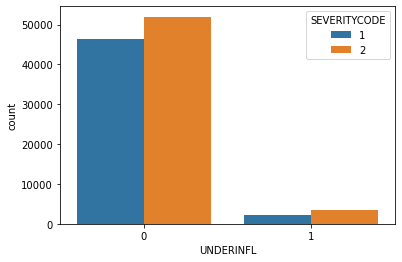

In [45]:
sns.countplot(x="UNDERINFL", hue="SEVERITYCODE", data=df2)

There is higher chance of 60% causing injure if driver under influence 

In [46]:
df2.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)

SPEEDING  SEVERITYCODE
0         2               0.529344
          1               0.470656
1         2               0.581754
          1               0.418246
Name: SEVERITYCODE, dtype: float64

<AxesSubplot:xlabel='SPEEDING', ylabel='count'>

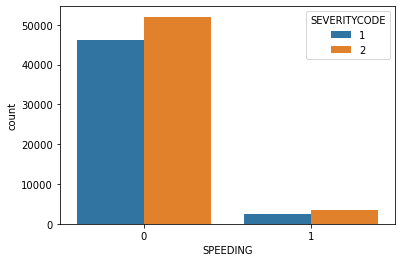

In [47]:
sns.countplot(x="SPEEDING", hue="SEVERITYCODE", data=df2)

There is higher chance of 58% causing injure in accidents of speeding 

In [48]:
from sklearn.linear_model import LinearRegression
X=df2[['WEATHER']]
Y=df2[['ROADCOND']]
lm=LinearRegression()
lm.fit(X,Y)
Yhat=lm.predict(X)
lm.score(X,Y)

0.6099962464814801

Indicate correlation between weather and road condition, drop one feature

### Final Feature Selection for Modeling 

In [49]:
X=df2[['ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL','HITPARKEDCAR']]
X.reset_index(drop=True,inplace=True)
X.head()

,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL,HITPARKEDCAR
0,2.0,3,0,0,2,3.0,1.0,0,0,0,0
1,2.0,2,0,0,2,2.0,1.0,0,0,0,0
2,1.0,2,0,0,2,1.0,2.0,0,0,0,0
3,1.0,2,0,0,2,1.0,1.0,0,1,0,0
4,1.0,2,0,0,2,2.0,3.0,0,0,1,0


In [50]:
y = df2['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1])

### Decision Tree

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (83338, 11) (83338,)
Test set: (20835, 11) (20835,)


In [52]:
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree.fit(X_train,y_train)
Tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
yhat = Tree.predict(X_test)
yhat

array([2, 2, 2, ..., 1, 1, 2])

In [54]:
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.6488120950323975


In [55]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.66      0.52      0.58      9693
           2       0.64      0.76      0.70     11142

   micro avg       0.65      0.65      0.65     20835
   macro avg       0.65      0.64      0.64     20835
weighted avg       0.65      0.65      0.64     20835



In [56]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

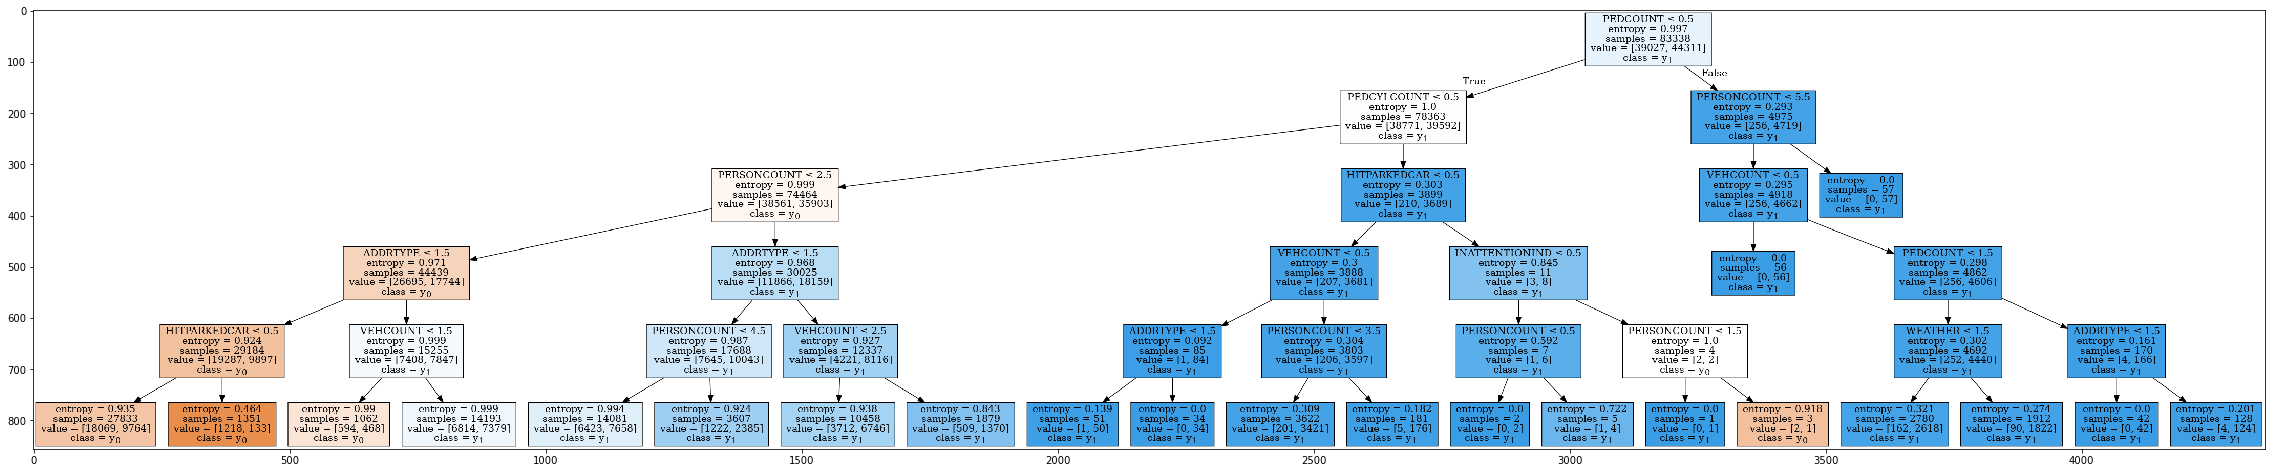

In [57]:
dot_data = StringIO()
filename = "accidenttree.png"
featureNames = X.columns[0:11]
targetNames = df2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree,feature_names=featureNames,out_file=dot_data,class_names=True,filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
plt.figure(figsize=(40, 40))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')

### Looking at accident causes only

In [59]:
X1=df2[['ADDRTYPE','WEATHER','LIGHTCOND','SPEEDING','INATTENTIONIND','UNDERINFL']]
X1.reset_index(drop=True,inplace=True)
X1.head()

,ADDRTYPE,WEATHER,LIGHTCOND,SPEEDING,INATTENTIONIND,UNDERINFL
0,2.0,3.0,1.0,0,0,0
1,2.0,2.0,1.0,0,0,0
2,1.0,1.0,2.0,0,0,0
3,1.0,1.0,1.0,0,1,0
4,1.0,2.0,3.0,0,0,1


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=4)
Tree1 = DecisionTreeClassifier(criterion="entropy", max_depth =5)
Tree1.fit(X_train,y_train)
yhat1 = Tree1.predict(X_test)
yhat1

array([2, 2, 1, ..., 1, 1, 2])

In [61]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat1))
print (classification_report(y_test, yhat1))

DecisionTrees's Accuracy:  0.5968322534197265
              precision    recall  f1-score   support

           1       0.57      0.53      0.55      9693
           2       0.62      0.66      0.63     11142

   micro avg       0.60      0.60      0.60     20835
   macro avg       0.59      0.59      0.59     20835
weighted avg       0.60      0.60      0.60     20835



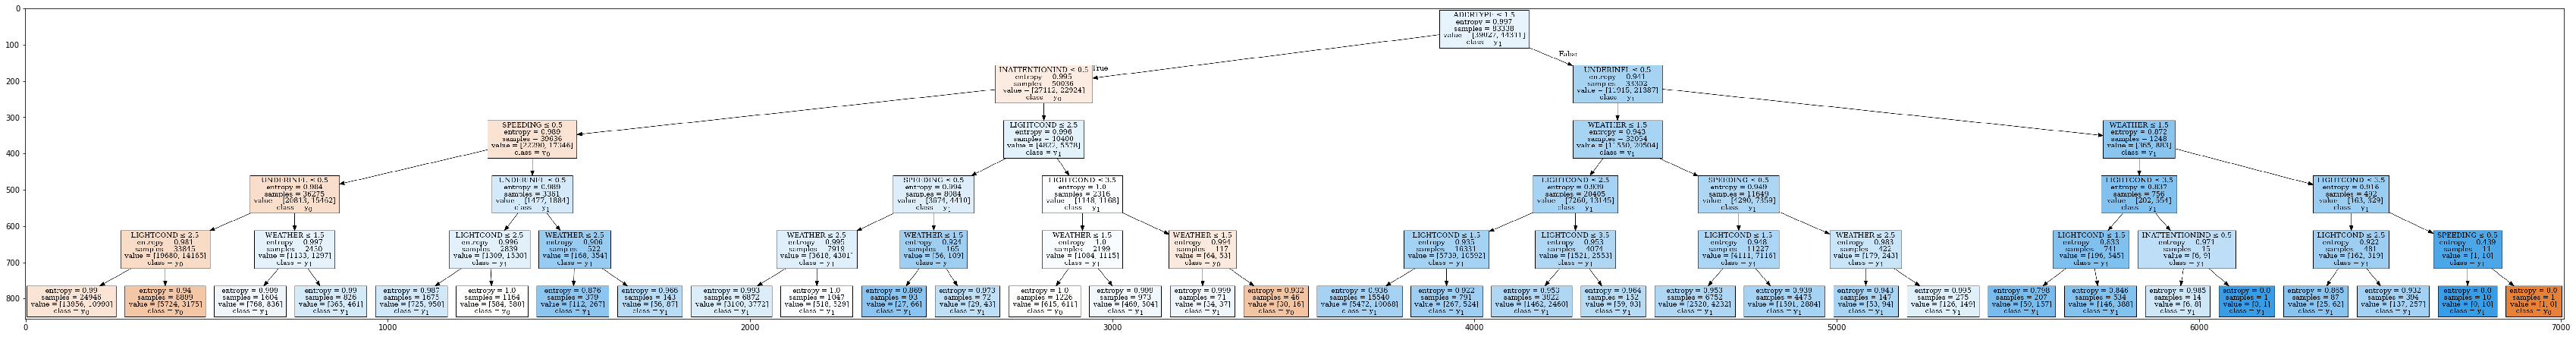

In [62]:
dot_data = StringIO()
filename = "accidenttree1.png"
featureNames = X1.columns[0:6]
targetNames = df2["SEVERITYCODE"].unique().tolist()
out=tree.export_graphviz(Tree1,feature_names=featureNames,out_file=dot_data,class_names=True,filled=True,special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
plt.figure(figsize=(60, 60))
img = mpimg.imread(filename)
plt.imshow(img,interpolation='nearest')